# Modèle Teacher

#### 1. Importations et configuration de l'environnement

In [1]:
import os
import sys

# S'assurer que le dossier contenant les modules est dans le path
sys.path.append(os.path.abspath("helper_teacher"))

from t_data_utils import load_and_preprocess_dataset, collate_fn, check_batch
from t_model_utils import load_pipeline, apply_lora
from t_train import train
from t_inference import generate_and_display, generate_image


from IPython.display import display

/root/addproject/env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/root/addproject/env/lib/python3.12/site-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


#### 2. Chargement et préparation du dataset

In [ ]:
dataset = load_and_preprocess_dataset()

Repo card metadata block was not found. Setting CardData to empty.
Prétraitement du dataset: 100%|██████████| 1221/1221 [00:32<00:00, 37.70it/s]


#### 3. Chargement du modèle Stable Diffusion

In [ ]:
pipe = load_pipeline(model_id="runwayml/stable-diffusion-v1-5")
tokenizer = pipe.tokenizer

Chargement du modèle Stable Diffusion depuis : runwayml/stable-diffusion-v1-5


/root/addproject/env/lib/python3.12/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Loading pipeline components...:  29%|██▊       | 2/7 [00:00<00:00, 13.35it/s]/root/addproject/env/lib/python3.12/site-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  5.24it/s]


Pipeline chargé avec succès.
Modèle utilisé : StableDiffusionPipeline
UNet type : UNet2DConditionModel
Tokenizer : CLIPTokenizer
Taille des embeddings texte : 768
Nombre de steps de diffusion : 1000
Type de scheduler : PNDMScheduler


#### Vérification d'un batch

✅ Image tensor shape: torch.Size([1, 3, 64, 64])
✅ Input IDs shape: torch.Size([1, 64])


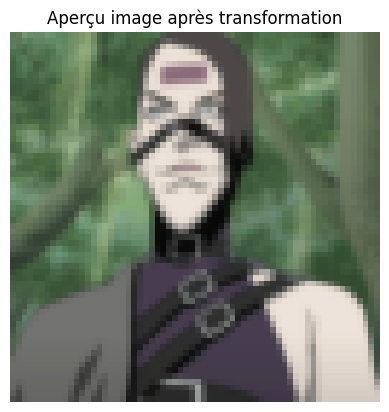

In [4]:
check_batch(dataset, tokenizer)

#### Test de génération

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:14<00:00,  3.34it/s]


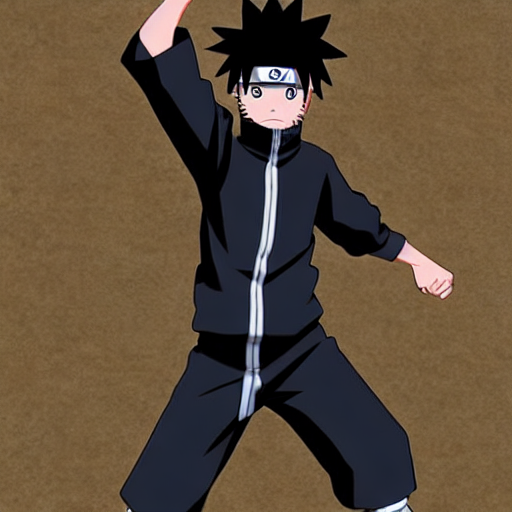

In [5]:
image = generate_and_display(pipe, prompt="A Naruto character in a battle")
display(image)

#### 4. Application de LoRA sur le modèle

In [ ]:
lora_params = apply_lora(pipe)

LoRA appliqué à 32 couches.
Nombre total de paramètres LoRA entraînables : 797184


#### 5. Entraînement du modèle avec LoRA

Epoch 0:   0%|          | 0/1221 [00:00<?, ?it/s]/root/addproject/env/lib/python3.12/site-packages/diffusers/models/attention_processor.py:1871: FutureWarning: `LoRAAttnProcessor` is deprecated and will be removed in version 0.26.0. Make sure use AttnProcessor instead by settingLoRA layers to `self.{to_q,to_k,to_v,to_out[0]}.lora_layer` respectively. This will be done automatically when using `LoraLoaderMixin.load_lora_weights`
  deprecate(
Epoch 2: 100%|██████████| 1221/1221 [10:34<00:00,  1.92it/s, loss=-0.000839]


Poids LoRA sauvegardés dans : ./naruto_weights_clean/teacher_lora_weights.bin


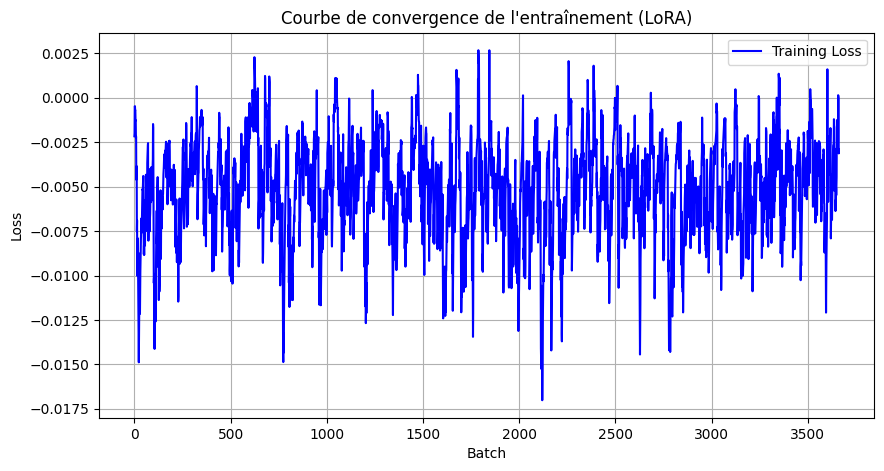

In [ ]:
loss_history = train(
    pipe=pipe,
    dataset=dataset,
    tokenizer=tokenizer,
    lora_params=lora_params,
    output_dir="./naruto_weights",
    gradient_accumulation_steps=2,
    epochs=1,
    batch_size=1
)

serait mieux d'utiliser du MSELose.

La courbe de perte LoRA est assez bruitée, ce qui est attendu avec un batch size de 1. On note qu’il n’y a pas de tendance nette à la baisse, ce qui suggère que le modèle est déjà stable ou que la métrique utilisée (ici mean() brute) ne reflète pas la convergence réelle. Un lissage ou une évaluation avec des métriques visuelles comme FID permettrait d’approfondir l’analyse

#### 6. Génération d’une image avec le modèle entraîné

100%|██████████| 50/50 [00:14<00:00,  3.53it/s]


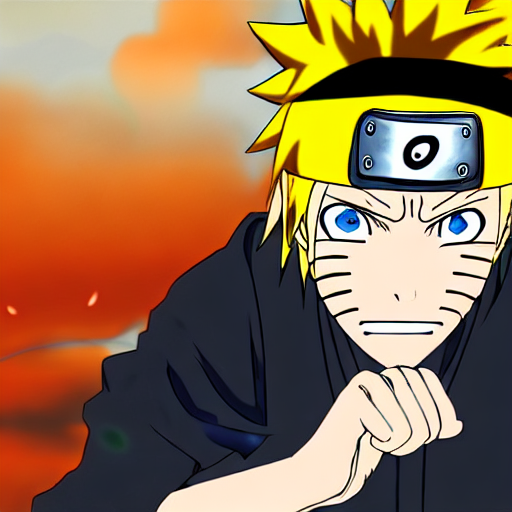

In [ ]:
image = generate_image(pipe, prompt="Naruto Uzumaki with a glowing aura")
display(image)